# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings('ignore')

# Load data
file_path = '/content/Data_Master.csv'  # Path to the uploaded dataset
master_df = pd.read_csv(file_path)


Forecasting for 16-day horizon...


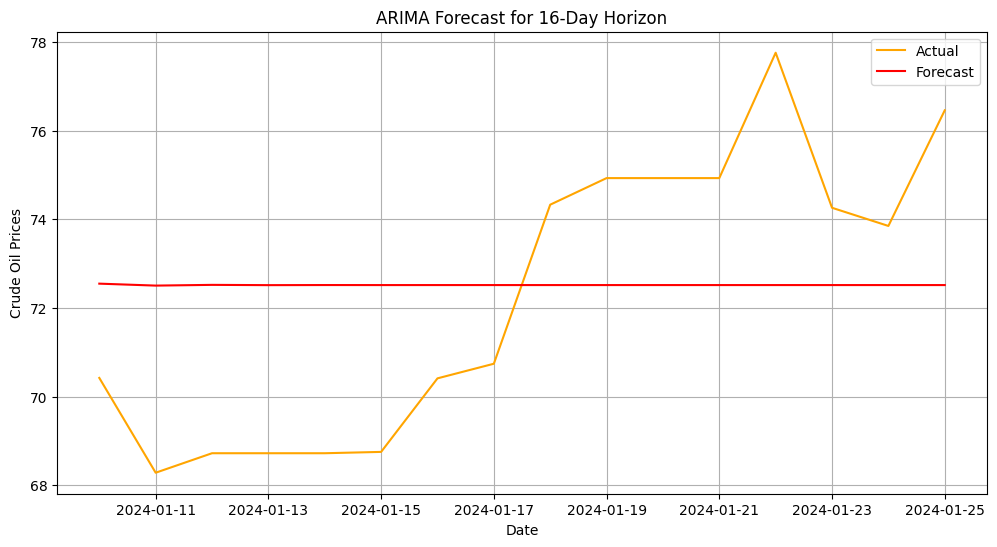

Forecasting for 48-day horizon...


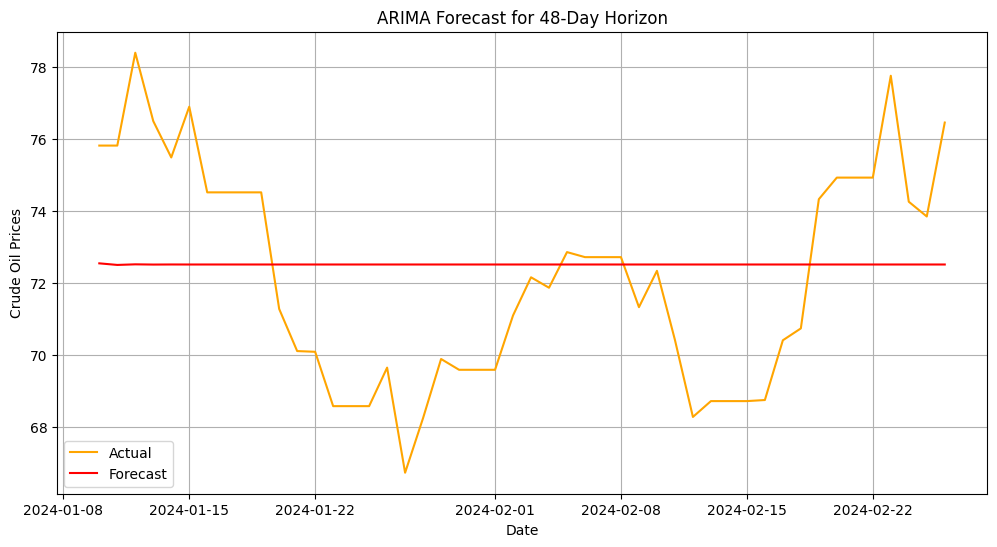

Forecasting for 96-day horizon...


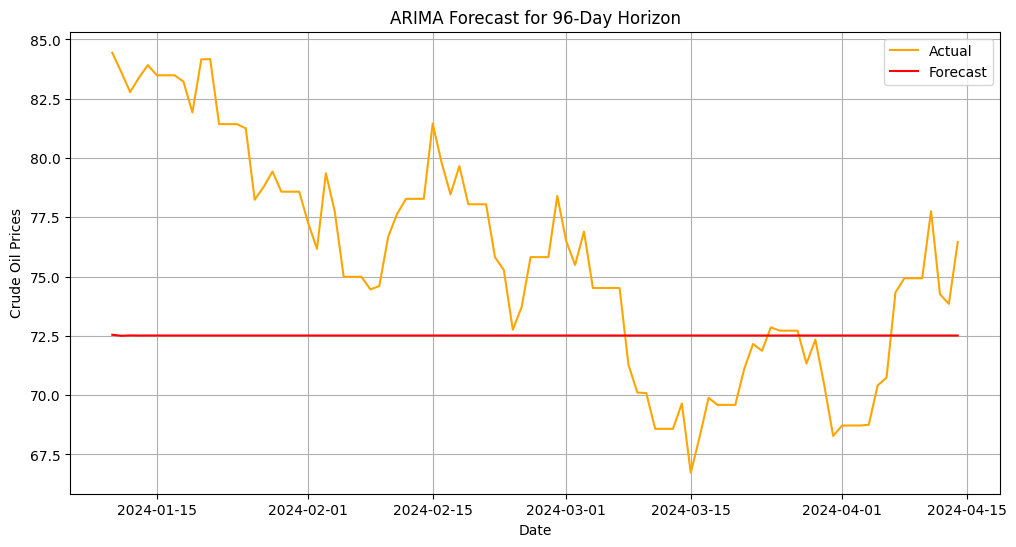


Results for 16-Day Horizon:
  MAE: 6.9069
  SMAPE: 8.9906

Results for 48-Day Horizon:
  MAE: 7.4859
  SMAPE: 9.7208

Results for 96-Day Horizon:
  MAE: 8.0757
  SMAPE: 10.4561


In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

# Load and preprocess data
file_path = '/content/Data_Master.csv'  # Replace with actual file path
master_df = pd.read_csv(file_path)

# Preprocess data
master_df['Date'] = pd.to_datetime(master_df['Date'], errors='coerce')
master_df = master_df.rename(columns={'Date': 'ds', 'crude': 'y'})
master_df = master_df.dropna()

# Split data
split = round(len(master_df) * 0.8)
train = master_df.iloc[:split]
test = master_df.iloc[split:]

# Rolling forecast parameters
window_size = 16  # Adjust based on the desired window
horizons = [16, 48, 96]
results = {}

for horizon in horizons:
    print(f"Forecasting for {horizon}-day horizon...")
    smapes = []
    maes = []

    for start in range(len(test) - horizon + 1):
        # Create a rolling window
        train_window = train['y'].values
        actual = test['y'].iloc[start:start + horizon].values

        # Fit ARIMA model
        model = ARIMA(train_window, order=(1, 1, 1))  # Adjust (p, d, q) as needed
        arima_result = model.fit()

        # Forecast
        forecast = arima_result.forecast(steps=horizon)

        # Metrics
        mae_value = mean_absolute_error(actual, forecast)
        smape_value = smape(actual, forecast)

        maes.append(mae_value)
        smapes.append(smape_value)

    # Store metrics
    results[horizon] = {
        'MAE': np.mean(maes),
        'SMAPE': np.mean(smapes),
    }

    # Visualization for the last forecast
    plt.figure(figsize=(12, 6))
    plt.plot(test['ds'].iloc[:horizon], actual, label='Actual', color='orange')
    plt.plot(test['ds'].iloc[:horizon], forecast, label='Forecast', color='red')
    plt.title(f'ARIMA Forecast for {horizon}-Day Horizon')
    plt.xlabel('Date')
    plt.ylabel('Crude Oil Prices')
    plt.legend()
    plt.grid()
    plt.show()

# Display evaluation metrics
for horizon, metrics in results.items():
    print(f"\nResults for {horizon}-Day Horizon:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
